<a href="https://colab.research.google.com/github/gabrielluizone/Retail-Analysis-One/blob/main/RetailAnalytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">

<h1><strong>Retail Analysis | One</strong></h1>
</div>

> A base de dados Varejo é um recorte de compras de 1.000 clientes realizadas em uma rede de supermercados famosa brasilheira.


![](https://raw.githubusercontent.com/gabrielluizone/Retail-Analysis-One/main/eBooks/RetailBanner.png)

<div class="markdown-google-sans">

### **4 Anos de Coleta, 830.000 Mil compras de 1.000 Mil clientes** | [Pão de Açucar](https://www.paodeacucar.com/)
</div>

- [Analysis Environment](https://colab.research.google.com/drive/1LEQhnL5iNC7-mNpTFVeJnaeY5xCbp55F?usp=sharing)
- [Documentation & Report](https://gabrielluizone.notion.site/RetailAnalytics-79337174172e46628f36b07623247919)
- [Repository](https://github.com/gabrielluizone/Retail-Analysis-One)


<div class="markdown-google-sans">
<h1><strong>Belo Mercado :)</strong></h1>
</div>

> Seria uma pena se alguma coisa acontecesse com ele...

![](https://raw.githubusercontent.com/gabrielluizone/Retail-Analysis-One/main/Others/Banner01.png)


<div class="markdown-google-sans">
<h1><strong>A Data Professional</strong></h1>
</div>

> Grandes empresas tem um Data Analyst, eu deveria contratar alguns e melhorar o direcionamento do meu mercado
- <div class="markdown-google-sans">Pleno Data Scientist</div>
- <div class="markdown-google-sans">Junior Data Analyst</div>

![](https://raw.githubusercontent.com/gabrielluizone/Retail-Analysis-One/main/Others/Banner02.png)

<div class="markdown-google-sans">
<h1><strong>Data Everywhere</strong></h1>
</div>

> Não posso mandar todos os dados para ele, isso pode destruir os PCs deles. Eles podem se virar com isso
- <div class="markdown-google-sans">Amostra dos Dados</div>
- <div class="markdown-google-sans">Super Data Professional</div>
- <div class="markdown-google-sans">2 Semanas de Prazo</div>

![](https://raw.githubusercontent.com/gabrielluizone/Retail-Analysis-One/main/Others/Banner03.png)

<div class="markdown-google-sans">
<h1><strong>Few Weeks Later</strong></h1>
</div>

> **Pleno Data Sciencit**\
17 recomendações para a equipe de marketing\
3 planos de fidelidade para os clientes\
2 previsões de vendas e maximização de lucro\
1 estratégia de aumento de clientes\

![](https://github.com/gabrielluizone/Retail-Analysis-One/blob/main/Others/Banner04.png?raw=true)

<div class="markdown-google-sans">
<h1><strong>Blue Pill & Red Pill</strong></h1>
</div>

![](https://raw.githubusercontent.com/gabrielluizone/Retail-Analysis-One/main/Others/Banner05.png)

<div class="markdown-google-sans">

## Libraries & Data Cleaning
</div>

- Remoção de colunas inúteis sem dados.
- Coluna em formato `datetime` para a análise em tempo.
- Alterando o nome das colunas e outras operações abaixo.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import calendar
import matplotlib.pyplot as plt
from tqdm import tqdm

# Estilo da Vizualização semelhante ao GGPlot2 (R)
plt.style.use('ggplot')

# Ajustando o máximo da vizualização do dataframe
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)

In [3]:
# Importação dos dados
df = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Retail-Analysis-One/main/BaseVarejo.csv', sep=';', encoding='latin-1')

# Removendo colunas inúteis
df.drop(columns=['Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], inplace=True)

# Tranformando a coluna DATA em formato datetime
df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y')

# Valores Nulos?
display(pd.DataFrame({'column': df.columns, 'dtype': df.dtypes.values, 'null_count': df.isnull().sum().values}))

# Renomeando as colunas 
df = df.rename(columns={'DATA': 'DATA', 'CO_ID': 'NOTA_FISCAL', 'CL_ID': 'CLIENTE_ID', 'CL_GENERO': 'CLIENTE_SEX', 'CL_EC': 'CLIENTE_EST_CIVIL',
                        'CL_FHL': 'CLIENTE_NUM_FILHOS', 'CL_SEG': 'CLIENTE_CLASSE', 'PR_ID': 'PRODUTO_ID', 'PR_CAT': 'PRODUTO_CATEGORIA', 'PR_NOME': 'PRODUTO_NOME'})

,column,dtype,null_count
0,DATA,datetime64[ns],0
1,CO_ID,int64,0
2,CL_ID,int64,0
3,CL_GENERO,object,0
4,CL_EC,int64,0
5,CL_FHL,int64,0
6,CL_SEG,object,0
7,PR_ID,int64,0
8,PR_CAT,object,0
9,PR_NOME,object,0


<div class="markdown-google-sans">

### Produtos e IDs

</div>

> Correção de IDs que se repetiam ao mesmo produto

`PRODUTO_ID`: Código do produto (SKU) adquirido. Repete 2 e 4 vezes para 109 produtos

In [4]:
# Análise de IDs se repetindo
dfgroup = df.loc[:, ['PRODUTO_ID', 'PRODUTO_NOME']].groupby(['PRODUTO_NOME']).nunique().reset_index()
print(f"Quantidade de ID vinculada ao produto: {dfgroup['PRODUTO_ID'].unique()}")

# Visualização dos produtos
display(dfgroup.loc[dfgroup['PRODUTO_ID'] != 1, :])

# Exportação para o relatório
dfgroup.loc[dfgroup['PRODUTO_ID'] != 1, :].to_csv('double_id.csv', index=False)

Quantidade de ID vinculada ao produto: [1 2 4]


,PRODUTO_NOME,PRODUTO_ID
9,ALMONDEGA,2
10,AMACIANTE,2
11,ARROZ,2
12,ARROZ INTEGRAL,2
13,ATUM,2
...,...,...
113,TIRA LIMO,2
114,TIRA MANCHA,2
115,TOMATE,2
116,UVA,2


In [5]:
# Algoritmo de Unificação de ID e Barra de Progresso | 9 Segundos de Execução
for nome in tqdm(dfgroup.loc[dfgroup['PRODUTO_ID'] != 1, 'PRODUTO_NOME']):
  df.loc[df['PRODUTO_NOME'] == nome, ['PRODUTO_ID']] = df.loc[df['PRODUTO_NOME'] == nome, 'PRODUTO_ID'].unique()[0]

# Verificação da Correção
dfgroup = df.loc[:, ['PRODUTO_ID', 'PRODUTO_NOME']].groupby(['PRODUTO_NOME']).nunique().reset_index()
print(f"Quantidade de ID vinculada ao produto: {dfgroup['PRODUTO_ID'].unique()}")
dfgroup.loc[dfgroup['PRODUTO_ID'] != 1, :]

100%|██████████| 109/109 [00:24<00:00,  4.39it/s]


Quantidade de ID vinculada ao produto: [1]


,PRODUTO_NOME,PRODUTO_ID


<div class="markdown-google-sans">

### Estado Civil
</div>

> Correção do identificador do estado civil. Utilização de um conjunto de dados anterior para a identificação da situação cívil\
`CLIENTE_EST_CIVIL`: Alteração dos estados 1, 2, 3, 4 para o correspondente

<div class="markdown-google-sans">

Situação do Cliente & Código
</div>

- CASADO OU UNIAO ESTAVEL: **1**
- DIVORCIADO: **2**
- SEPARADO: **3**
- SOLTEIRO: **4**
- VIUVO: **5**



In [6]:
# Importação do antigo conjunto
old = pd.read_csv('https://raw.githubusercontent.com/gabrielluizone/Retail-Analysis-One/main/Others/BaseVarejoOld.csv', sep=';', encoding='latin-1')

# Tranformando a coluna DATA em formato datetime
old['DATA'] = pd.to_datetime(old['DATA'], format='%d/%m/%Y')

# Renomeando as colunas 
old = old.rename(columns={'DATA': 'DATA', 'CO_ID': 'NOTA_FISCAL', 'CL_ID': 'CLIENTE_ID', 'CL_GENERO': 'CLIENTE_SEX', 'CL_EC': 'CLIENTE_EST_CIVIL',
                        'CL_FHL': 'CLIENTE_NUM_FILHOS', 'CL_SEG': 'CLIENTE_CLASSE', 'PR_ID': 'PRODUTO_ID', 'PR_CAT': 'PRODUTO_CATEGORIA', 'PR_NOME': 'PRODUTO_NOME'})

In [7]:
# União de dados com específicas colunas com linhas semelhantes para a identificação
est = pd.merge(df[['DATA', 'CLIENTE_ID', 'CLIENTE_SEX', 'CLIENTE_EST_CIVIL', 'CLIENTE_NUM_FILHOS', 'CLIENTE_CLASSE', 'PRODUTO_CATEGORIA', 'PRODUTO_NOME']], 
                  old[['DATA', 'CLIENTE_ID', 'CLIENTE_SEX', 'CLIENTE_EST_CIVIL', 'CLIENTE_NUM_FILHOS', 'CLIENTE_CLASSE', 'PRODUTO_CATEGORIA', 'PRODUTO_NOME']], 
                  on=['DATA', 'CLIENTE_ID', 'CLIENTE_SEX', 'CLIENTE_NUM_FILHOS', 'CLIENTE_CLASSE', 'PRODUTO_CATEGORIA', 'PRODUTO_NOME'], 
                  how='inner')

# Análisando a tabela
print(f'Os valores são correspondentes ao que dizem ser')
display(est[['CLIENTE_EST_CIVIL_x', 'CLIENTE_EST_CIVIL_y']])

# Verificando se os possuem valores unicos
print(f'\nQuantidade unicos de identificadores agrupados')
display(est[['CLIENTE_EST_CIVIL_x', 'CLIENTE_EST_CIVIL_y']].groupby('CLIENTE_EST_CIVIL_y').nunique().reset_index())

# Obtendo as respostas 
print(f'\nObtendo os identificadores')
display(est[['CLIENTE_EST_CIVIL_x', 'CLIENTE_EST_CIVIL_y']].groupby(['CLIENTE_EST_CIVIL_y', 'CLIENTE_EST_CIVIL_x']).nunique().reset_index())

Os valores são correspondentes ao que dizem ser


,CLIENTE_EST_CIVIL_x,CLIENTE_EST_CIVIL_y
0,2,DIVORCIADO
1,2,DIVORCIADO
2,1,CASADO OU UNIAO ESTAVEL
3,1,CASADO OU UNIAO ESTAVEL
4,1,CASADO OU UNIAO ESTAVEL
...,...,...
66,4,SOLTEIRO
67,4,SOLTEIRO
68,1,CASADO OU UNIAO ESTAVEL
69,1,CASADO OU UNIAO ESTAVEL



Quantidade unicos de identificadores agrupados


,CLIENTE_EST_CIVIL_y,CLIENTE_EST_CIVIL_x
0,CASADO OU UNIAO ESTAVEL,1
1,DIVORCIADO,1
2,SEPARADO,1
3,SOLTEIRO,1



Obtendo os identificadores


,CLIENTE_EST_CIVIL_y,CLIENTE_EST_CIVIL_x
0,CASADO OU UNIAO ESTAVEL,1
1,DIVORCIADO,2
2,SEPARADO,3
3,SOLTEIRO,4


In [8]:
# Correção do Problema
df['CLIENTE_EST_CIVIL'] = df['CLIENTE_EST_CIVIL'].apply(lambda x : 'CASADO OU UNIAO ESTAVEL' if x == 1 else 'DIVORCIADO' if x == 2 else 'SEPARADO' if x == 3 else 'SOLTEIRO' if x == 4 else 'VIUVO' if x == 5 else '#N/A')

<div class="markdown-google-sans">

## Descriptive Analysis
</div>

> Visa obter conclusões e uma descrição a respeito dos dados para que, ao longo da análise, possamos ter conhecimento o suficiente a respeito da população para não haver dúvidas. Obter uma visão geral da nossa população e como estão distribuídos nos dados.

<Figure size 900x400 with 0 Axes>

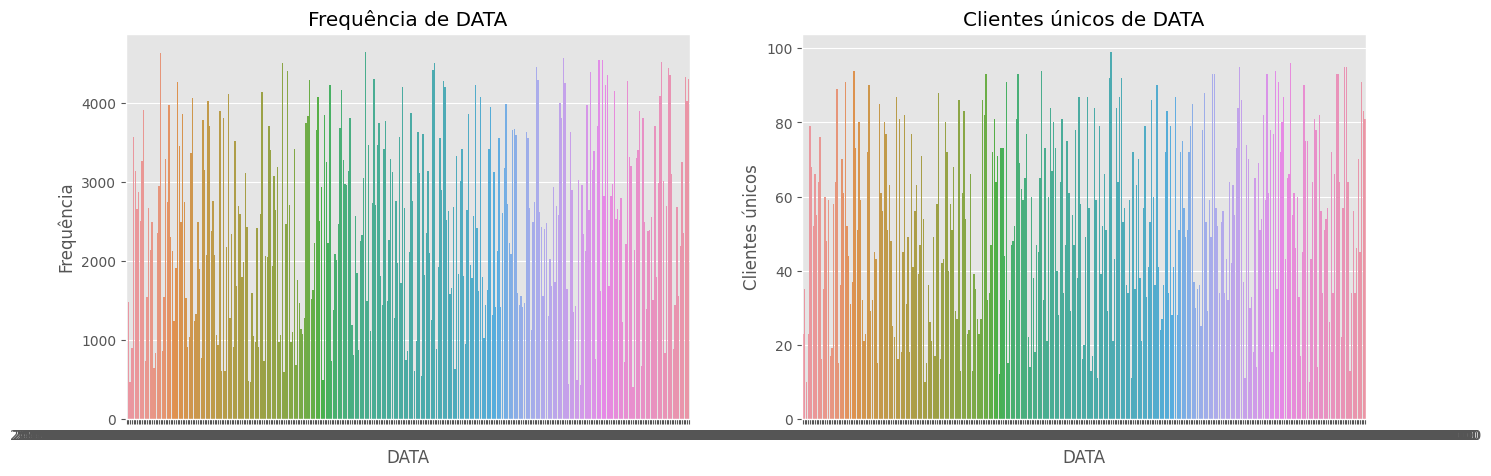



>>> Coluna DATA <<<


,DATA,FREQUENCIA,PROPORÇÃO (%),CL_UNICOS,PROP. UNICOS (%)
0,2019-01-04,968,0.0,23,0.0
1,2019-01-13,1475,0.0,35,0.0
2,2019-01-19,471,0.0,10,0.0
3,2019-01-23,893,0.0,23,0.0
4,2019-01-29,3561,0.0,79,0.0
...,...,...,...,...,...
328,2022-11-06,3254,0.0,70,0.0
329,2022-12-03,2356,0.0,45,0.0
330,2022-12-05,4325,1.0,91,1.0
331,2022-12-07,4025,0.0,83,0.0


<Figure size 900x400 with 0 Axes>

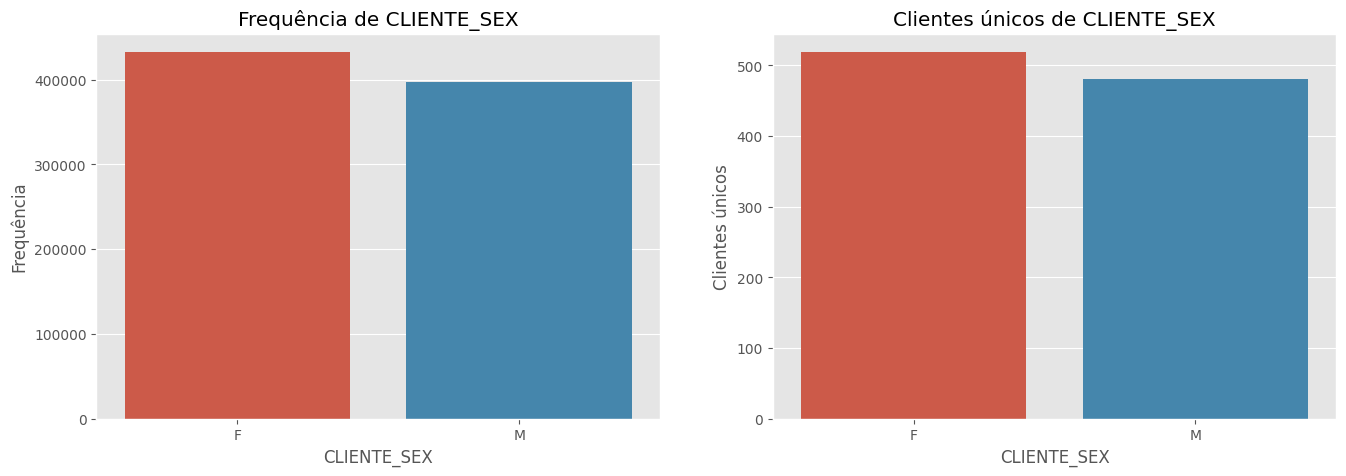



>>> Coluna CLIENTE_SEX <<<


,CLIENTE_SEX,FREQUENCIA,PROPORÇÃO (%),CL_UNICOS,PROP. UNICOS (%)
0,F,432576,52.0,519,52.0
1,M,397424,48.0,481,48.0


<Figure size 900x400 with 0 Axes>

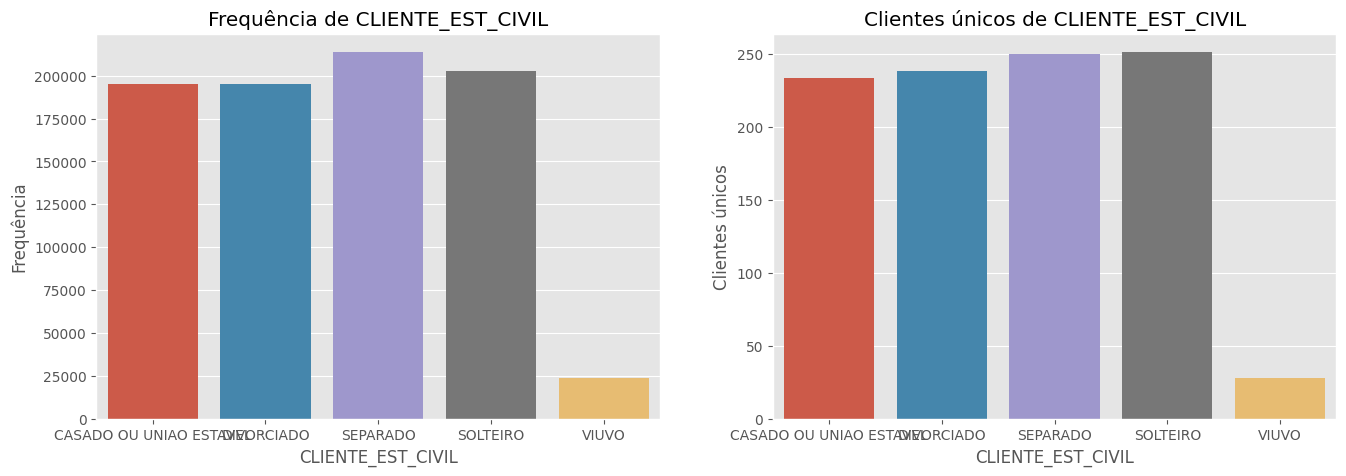



>>> Coluna CLIENTE_EST_CIVIL <<<


,CLIENTE_EST_CIVIL,FREQUENCIA,PROPORÇÃO (%),CL_UNICOS,PROP. UNICOS (%)
0,CASADO OU UNIAO ESTAVEL,194873,23.0,233,23.0
1,DIVORCIADO,194990,23.0,238,24.0
2,SEPARADO,213742,26.0,250,25.0
3,SOLTEIRO,202618,24.0,251,25.0
4,VIUVO,23777,3.0,28,3.0


<Figure size 900x400 with 0 Axes>

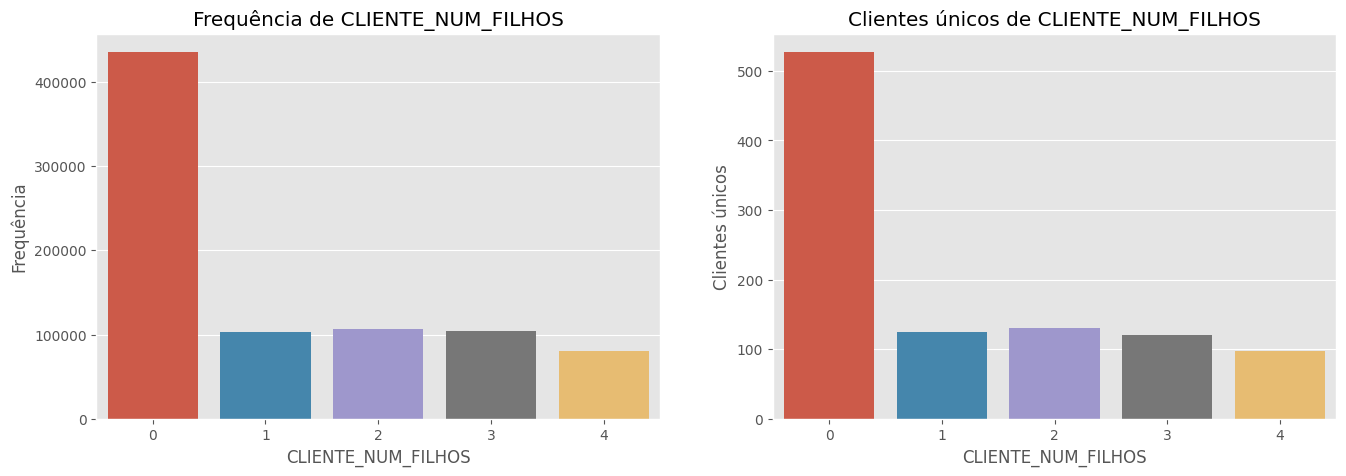



>>> Coluna CLIENTE_NUM_FILHOS <<<


,CLIENTE_NUM_FILHOS,FREQUENCIA,PROPORÇÃO (%),CL_UNICOS,PROP. UNICOS (%)
0,0,435501,52.0,527,53.0
1,1,102813,12.0,125,12.0
2,2,106622,13.0,130,13.0
3,3,104685,13.0,121,12.0
4,4,80379,10.0,97,10.0


<Figure size 900x400 with 0 Axes>

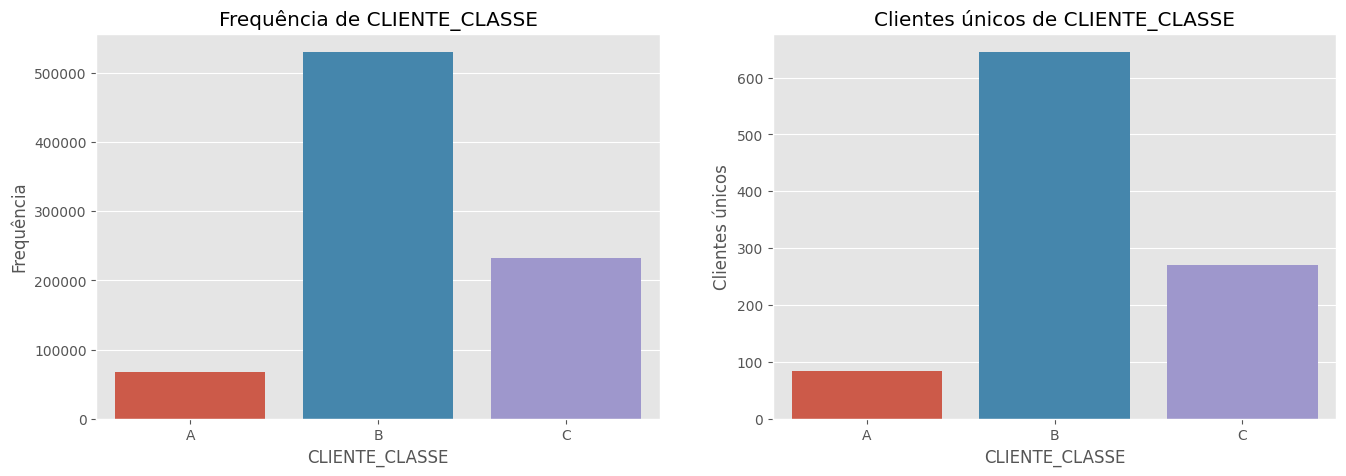



>>> Coluna CLIENTE_CLASSE <<<


,CLIENTE_CLASSE,FREQUENCIA,PROPORÇÃO (%),CL_UNICOS,PROP. UNICOS (%)
0,A,67736,8.0,84,8.0
1,B,530163,64.0,645,64.0
2,C,232101,28.0,271,27.0


<Figure size 900x400 with 0 Axes>

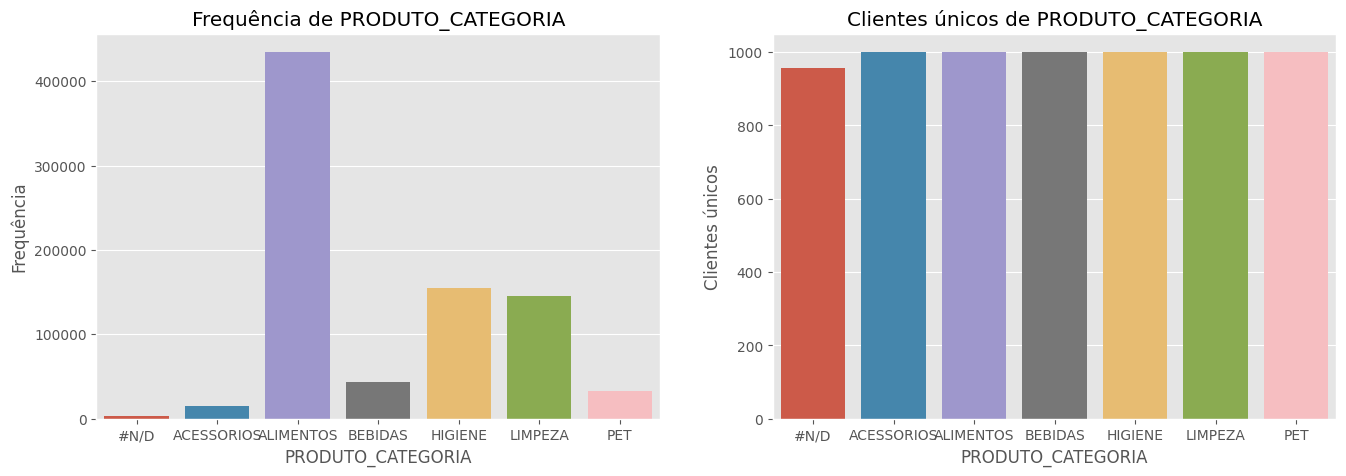



>>> Coluna PRODUTO_CATEGORIA <<<


,PRODUTO_CATEGORIA,FREQUENCIA,PROPORÇÃO (%),CL_UNICOS,PROP. UNICOS (%)
0,#N/D,3650,0.0,956,14.0
1,ACESSORIOS,14557,2.0,1000,14.0
2,ALIMENTOS,434767,52.0,1000,14.0
3,BEBIDAS,43299,5.0,1000,14.0
4,HIGIENE,155574,19.0,1000,14.0
5,LIMPEZA,145754,18.0,1000,14.0
6,PET,32399,4.0,1000,14.0


In [9]:
# Obter a frequencia de Itens e População
for i in [0, 3, 4, 5, 6, 8]:
  plt.figure(figsize=(9, 4))

  # Obtém o nome da coluna a ser analisada
  column = df.columns[i]
    
  # Cria um DataFrame com a frequência e unidades unicas da coluna e a contagem
  freq_df = df[[column, 'NOTA_FISCAL']].groupby(column).count().reset_index()
  freq_df = freq_df.rename(columns={'NOTA_FISCAL': 'FREQUENCIA'})

  # Calcula a porcentagem em relação à população total
  freq_df['PROPORÇÃO (%)'] = round(freq_df['FREQUENCIA'] / df.shape[0] * 100, 0)

  # Valores referidos somente ao cliente, sem repetição
  freq_df['CL_UNICOS'] = df[[column, 'CLIENTE_ID']].groupby(column).nunique().reset_index()['CLIENTE_ID']
    
  # Calcula a porcentagem em relação à população total
  freq_df['PROP. UNICOS (%)'] = round((freq_df['CL_UNICOS'] / freq_df['CL_UNICOS'].sum()) * 100, 0)
    
  # Cria uma figura com duas subplots
  fig, axs = plt.subplots(1, 2, figsize=(16, 5))

  # Plot 1: Frequência
  sns.barplot(x=column, y='FREQUENCIA', data=freq_df, ax=axs[0])
  axs[0].set_title(f'Frequência de {column}')
  axs[0].set_xlabel(column)
  axs[0].set_ylabel('Frequência')

  # Plot 2: Clientes únicos
  sns.barplot(x=column, y='CL_UNICOS', data=freq_df, ax=axs[1])
  axs[1].set_title(f'Clientes únicos de {column}')
  axs[1].set_xlabel(column)
  axs[1].set_ylabel('Clientes únicos')

  # Exibe o dashboard
  plt.show()
  print(f'\n\n>>> Coluna {column} <<<')
  display(freq_df)

<div class="markdown-google-sans">

## Análise Temporal
</div>

> Pela ausência de dias no dataset, isso pode afetar a análise temporal, ao poderem impactar nas tendências e padrões. Além disso, se os dados faltantes não estiverem distribuídos aleatoriamente, isso pode levar a um viés nos resultados.


In [10]:
# Criação de um novo dataframe para a análise
tmp = df.loc[ :, ['DATA', 'NOTA_FISCAL', 'CLIENTE_ID', 'CLIENTE_SEX', 'CLIENTE_EST_CIVIL', 'CLIENTE_NUM_FILHOS',
           'CLIENTE_CLASSE', 'PRODUTO_CATEGORIA', 'PRODUTO_NOME'] ].copy()

# Lista com datas em um periodo do mnimo e máximo do dataset
date_range = pd.date_range(start=tmp['DATA'].min(), end=tmp['DATA'].max())
all_dates = pd.DataFrame({'DATA': date_range})

# Fazendo o left join com o dataframe tmp
tmp = pd.merge(all_dates, tmp, on='DATA', how='left')
print(f"Dias sem coleta: {tmp[tmp['CLIENTE_ID'].isnull()]['DATA'].count()}")

Dias sem coleta: 1102


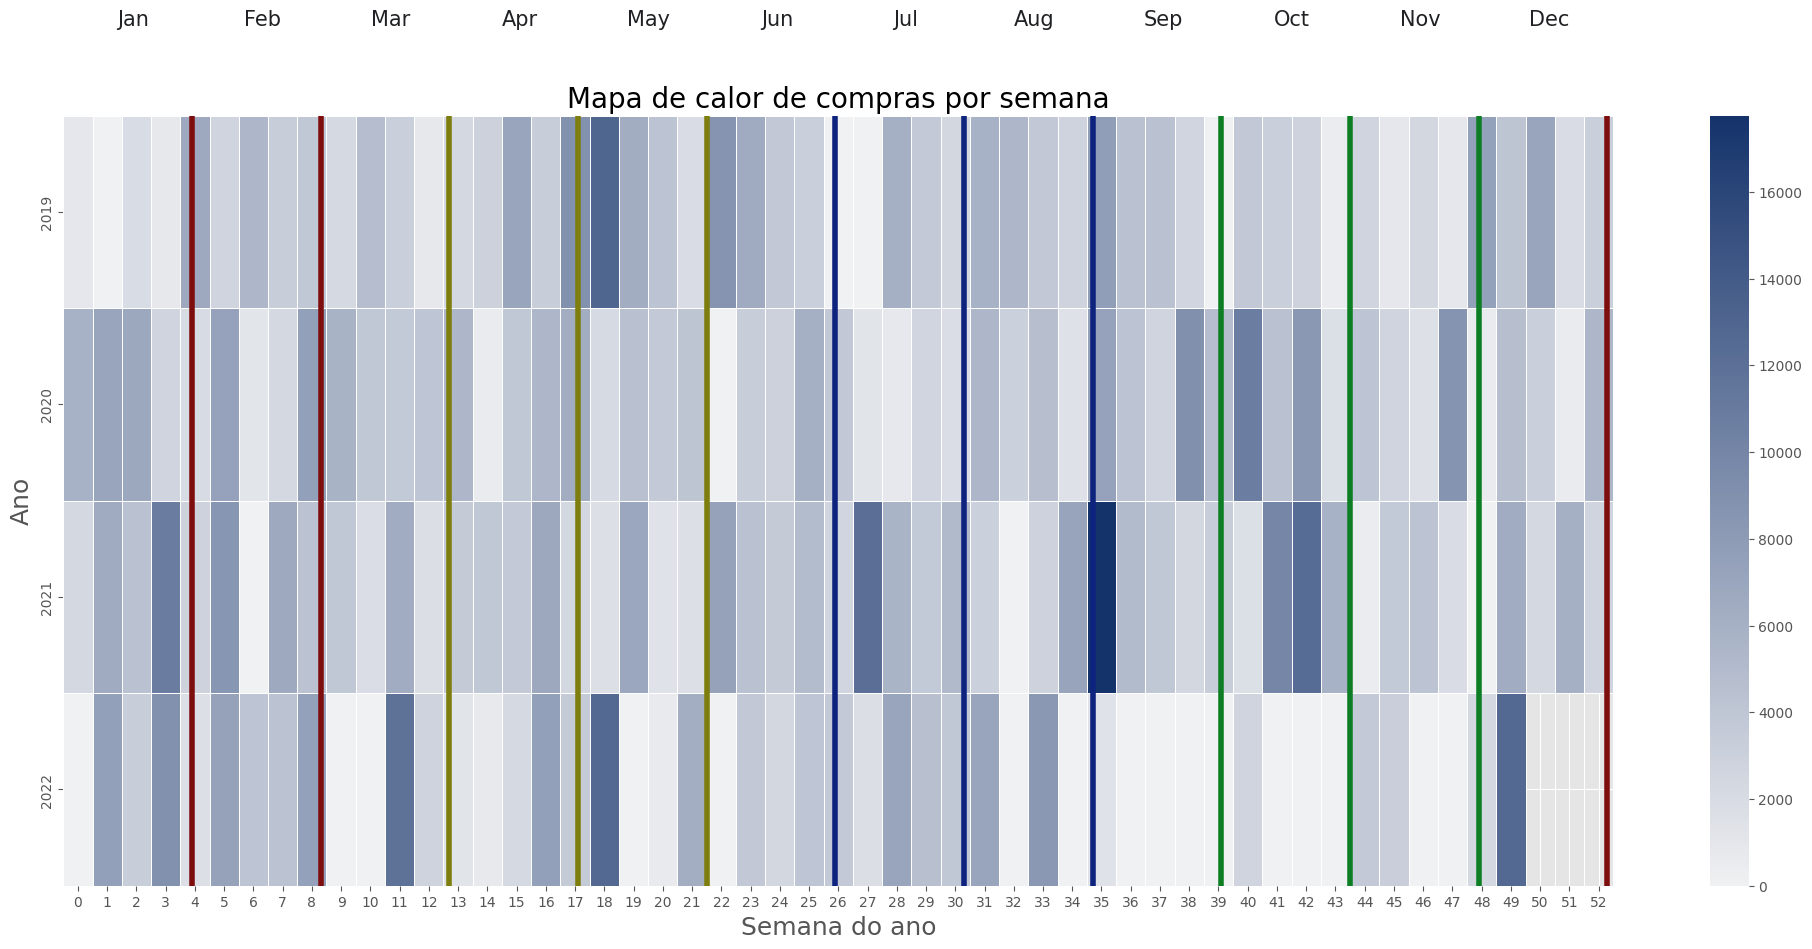

In [11]:
# Definindo a coluna semana | 'NOTA_FISCAL' para as compras & 'CLIENTE_ID' para os clientes
tmp['semana'] = tmp['DATA'].dt.strftime('%Y-%U')
heatmap_data = pd.pivot_table(tmp, values='NOTA_FISCAL', index='semana', aggfunc='count')

# Extrai o ano da semana & ano e converte para inteiro
heatmap_data['ano'] = heatmap_data.index.map(lambda x: str(x)[:10].split('-')[0]).astype(int)
heatmap_data['semana'] = heatmap_data.index.map(lambda x: str(x)[:10].split('-')[1]).astype(int)

# definindo a paleta de cores e a vizualização do mapa de calor
plt.figure(figsize=(25,10))
blun = cmap=sns.light_palette("#15336B", as_cmap=True)
sns.heatmap(data=heatmap_data.pivot('ano', 'semana', 'NOTA_FISCAL'), cmap=blun, linewidths=0.5, annot=False, fmt='g')
plt.title('Mapa de calor de compras por semana', fontsize=20)
plt.xlabel('Semana do ano', fontsize=18)
plt.ylabel('Ano', fontsize=18)

# Adiciona linhas para indicar o mês e a estação do ano
ax = plt.gca()
for i in range(1, 13):
    ax.text(i*4.4-2, -0.5, calendar.month_name[i][:3], ha='center', va='center', fontsize=15, color='#202124')
    if i in [1, 2, 12]: # Verão
        ax.axvline(x=i*4.4, color='#7E0E0E', lw=4)
    elif i in [3, 4, 5]: # Outono
        ax.axvline(x=i*4.4, color='#7E7E0E', lw=4)
    elif i in [6, 7, 8]: # Inverno
        ax.axvline(x=i*4.4, color='#0E237E', lw=4)
    else: # Primavera
        ax.axvline(x=i*4.4, color='#0E7E25', lw=4)


<div class="markdown-google-sans">

### Clientes por Semana
</div>

> Podemos perceber que a quantidade de produtos comprados é maior nos dias de quarta-feira e sexta-feira. Além disso, a média de clientes por semana é praticamente a mesma para todos os dias da semana

Taxa de Cliêntes que Frequentam o Mercado pela Semana: 9%


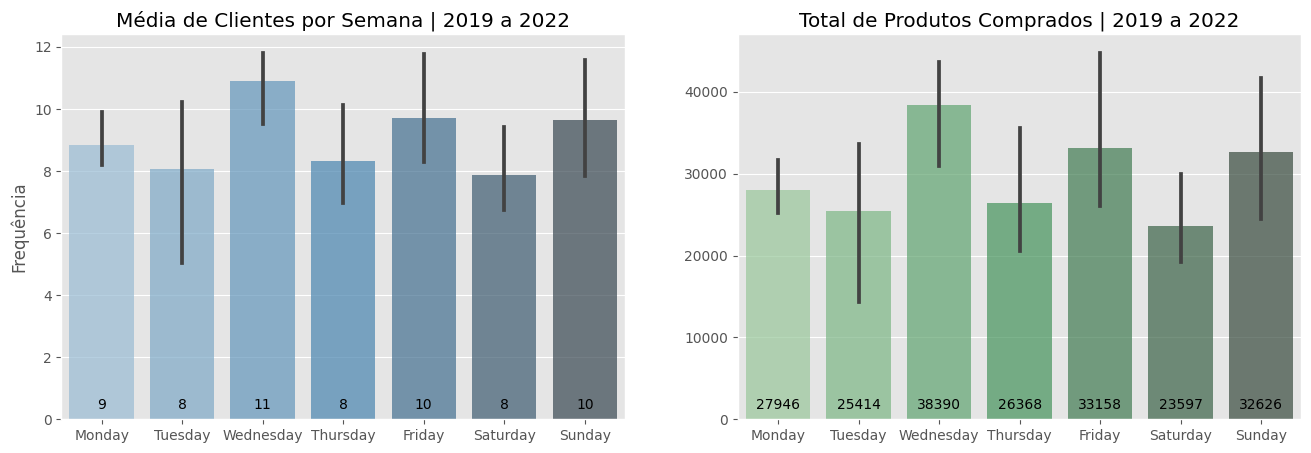

In [18]:
# Extraindo o dia da semana da coluna "DATA"
tmp['ANO'] = tmp['DATA'].dt.year
tmp['semana'] = tmp['DATA'].dt.strftime('%U-%Y')
tmp['DIA_SEMANA'] = tmp['DATA'].dt.day_name()
week = tmp.groupby(['ANO', 'DIA_SEMANA']).agg({'CLIENTE_ID': lambda x: x.nunique()/52, 'NOTA_FISCAL': 'count'}).reset_index()
daywk = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# taxa de Clientes que Frequentam ao longo da Semana
print(f"Taxa de Cliêntes que Frequentam o Mercado pela Semana: {int((week['CLIENTE_ID'].mean() / 1000)* df['CLIENTE_ID'].nunique(),)}%")

# Vizualização da tabela e axis para o dashboard
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot( x='DIA_SEMANA', y='CLIENTE_ID', data=week, palette='Blues_d', ax=axs[0], order=daywk, alpha=0.7)
sns.barplot( x='DIA_SEMANA', y='NOTA_FISCAL', data=week, palette='Greens_d', ax=axs[1], order=daywk, alpha=0.7)

# Adicionando os valores dentro do gráfico
for ax in axs:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., 0), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points',
                    color='black') # alterando a cor do texto para branco

# Titulos e rotulos
axs[0].set_title('Média de Clientes por Semana | 2019 a 2022')
axs[0].set_xlabel(None)
axs[0].set_ylabel('Frequência')

axs[1].set_title(f'Total de Produtos Comprados | 2019 a 2022')
axs[1].set_xlabel(None)
axs[1].set_ylabel(None);


Taxa de Cliêntes que Frequentam o Mercado pela Semana: 3%


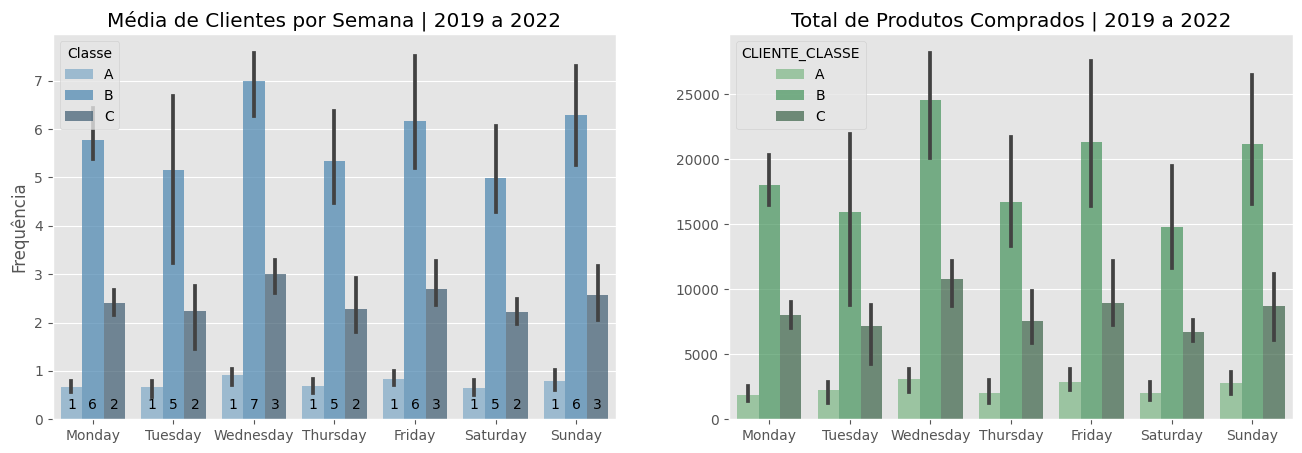

In [16]:
# Extraindo o dia da semana da coluna "DATA"
tmp['semana'] = tmp['DATA'].dt.strftime('%U-%Y')
week = tmp.groupby(['ANO', 'DIA_SEMANA', 'CLIENTE_CLASSE']).agg({'CLIENTE_ID': lambda x: x.nunique()/52, 'NOTA_FISCAL': 'count'}).reset_index()
daywk = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# taxa de Clientes que Frequentam ao longo da Semana
print(f"Taxa de Cliêntes que Frequentam o Mercado pela Semana: {int((week['CLIENTE_ID'].mean() / 1000)* df['CLIENTE_ID'].nunique(),)}%")

# Vizualização da tabela e axis para o dashboard
fig, axs = plt.subplots(1, 2, figsize=(16, 5))
sns.barplot(x='DIA_SEMANA', y='CLIENTE_ID', hue='CLIENTE_CLASSE', data=week, palette='Blues_d', ax=axs[0], order=daywk, alpha=0.7)
sns.barplot(x='DIA_SEMANA', y='NOTA_FISCAL', hue='CLIENTE_CLASSE', data=week, palette='Greens_d', ax=axs[1], order=daywk, alpha=0.7)

# Adicionando os valores dentro do gráfico
for ax in axs:
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., 0), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 10), 
                    textcoords = 'offset points',
                    color='black') # alterando a cor do texto para branco
    break

# Titulos e rotulos
axs[0].set_title('Média de Clientes por Semana | 2019 a 2022')
axs[0].set_xlabel(None)
axs[0].set_ylabel('Frequência')
axs[0].legend(title='Classe', loc='upper left')

axs[1].set_title(f'Total de Produtos Comprados | 2019 a 2022')
axs[1].set_xlabel(None)
axs[1].set_ylabel(None);


<div class="markdown-google-sans">

## Product Analysis
</div>

> Não foi encontrado nenhuma tendência nos dados, aliás, só foi reforçado que os dados não estão seguindo os padrões e eles devem ser revisados ou aderir a um novo conjunto de dados para a análise.


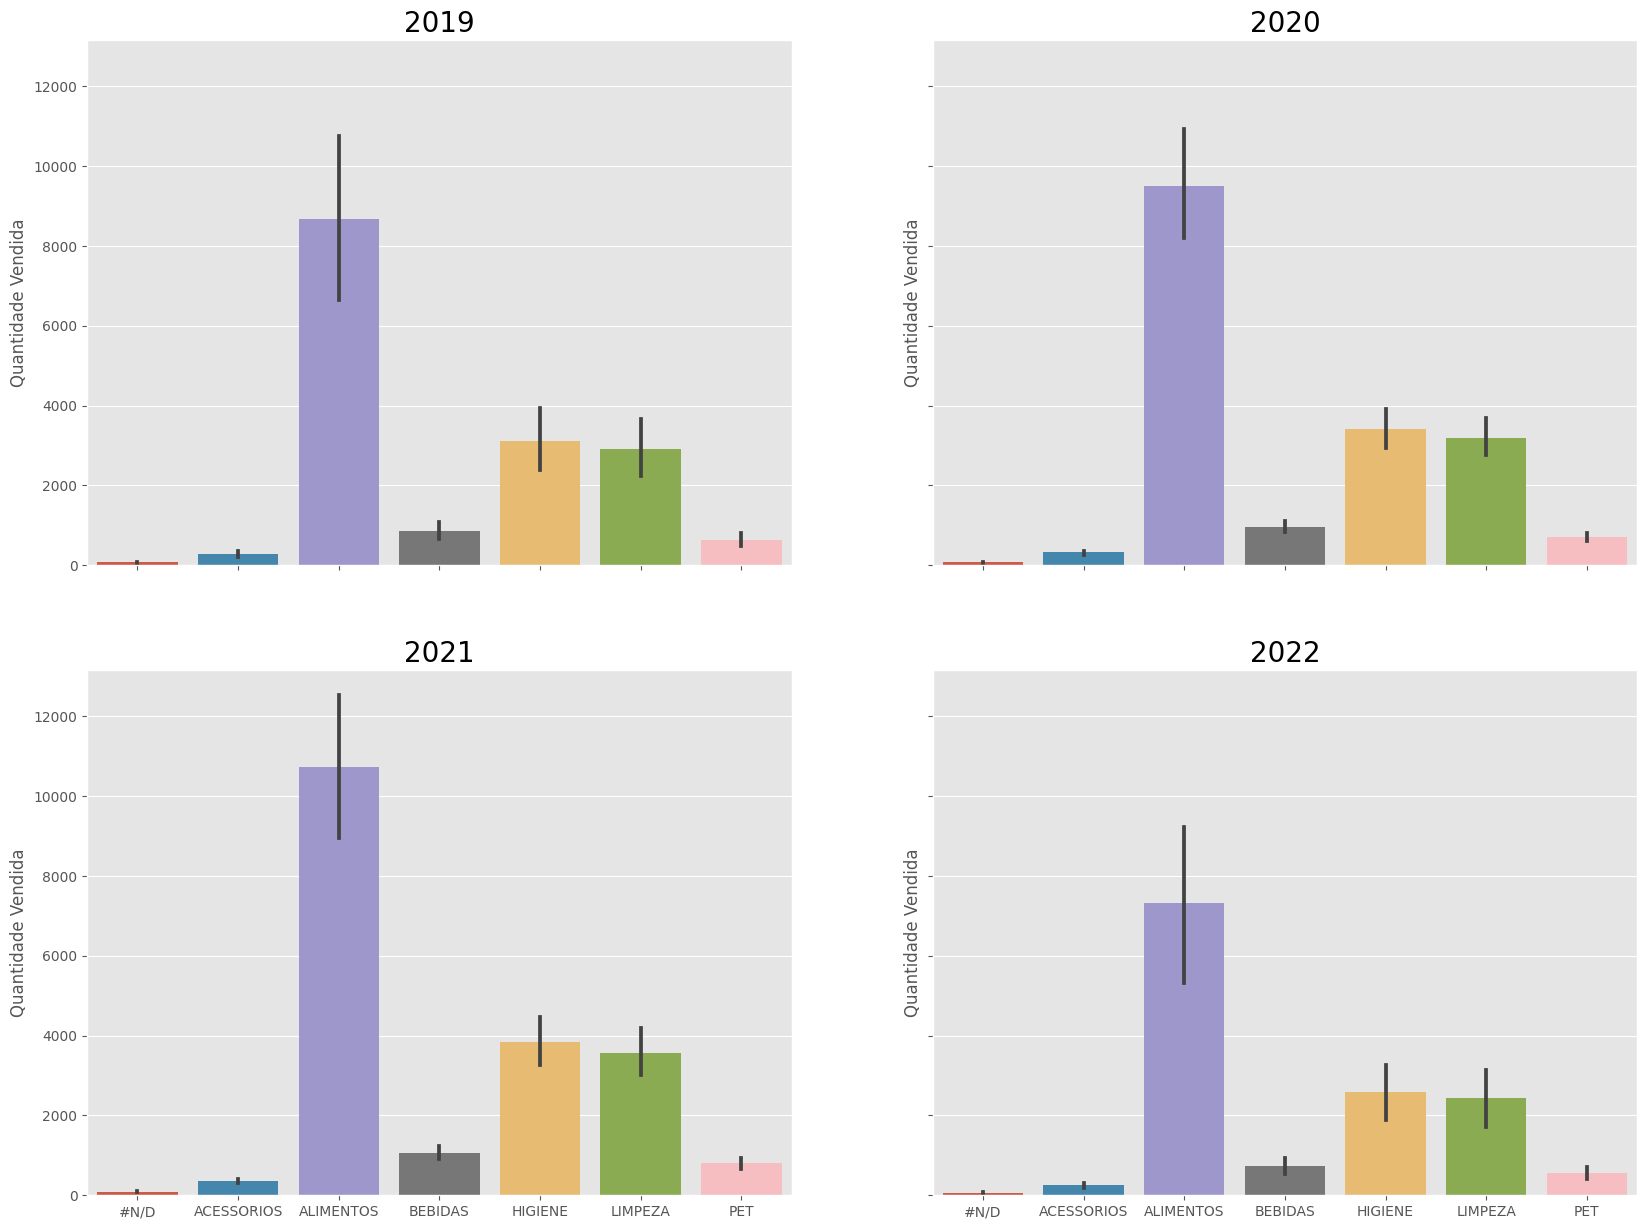

In [21]:
tmp['YEAR'] = tmp['DATA'].dt.year
tmp['MONTH'] = tmp['DATA'].dt.month
tabela = pd.pivot_table(tmp, values='NOTA_FISCAL', index=['YEAR', 'MONTH'], 
                        columns=['PRODUTO_CATEGORIA'], aggfunc='count')

# Criação do gráfico
fig, axs = plt.subplots(2, 2, figsize=(20, 15), sharex=True, sharey=True)
axs = axs.ravel()

for i, ano in enumerate([2019, 2020, 2021, 2022]):
    dados_ano = tabela.loc[ano]
    sns.barplot(data=dados_ano, ax=axs[i])
    axs[i].set_title(ano, fontsize=20)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Quantidade Vendida')

plt.show()

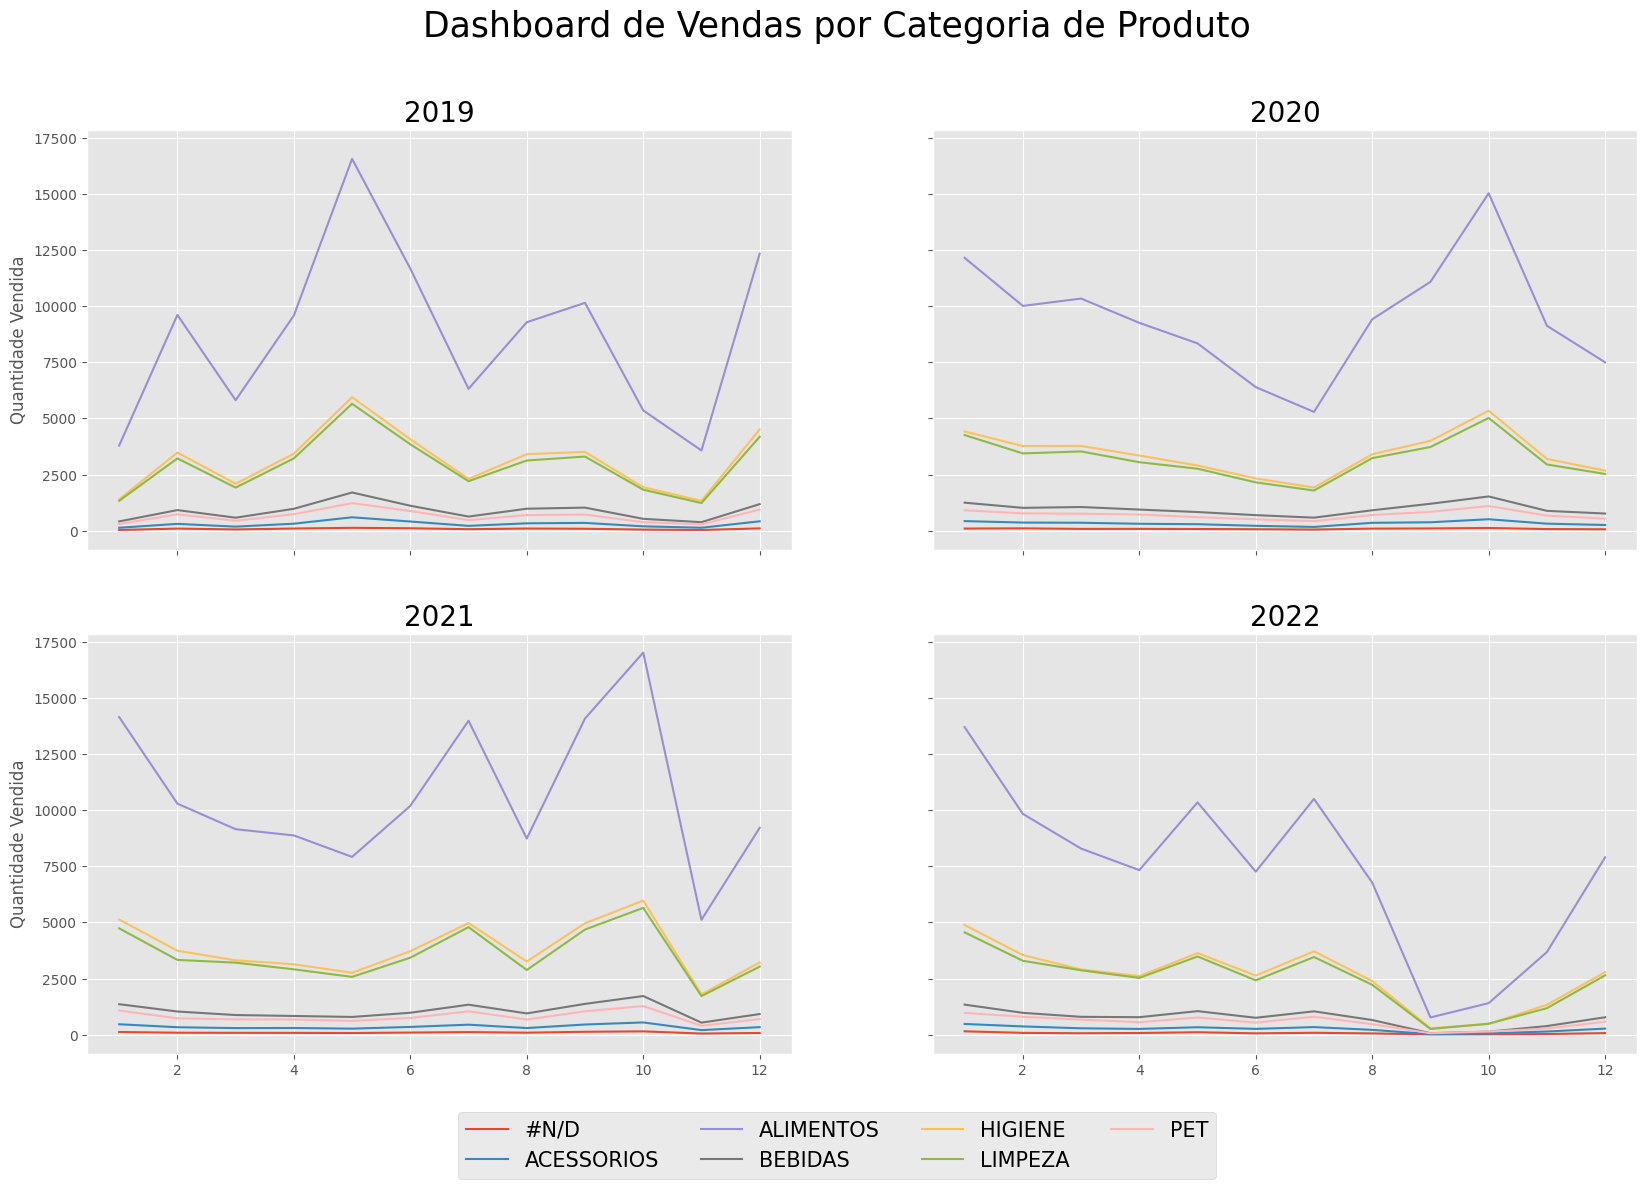

In [24]:
# Criação da tabela pivot
tabela = pd.pivot_table(tmp, values='NOTA_FISCAL', index=['YEAR', 'MONTH'], 
                        columns=['PRODUTO_CATEGORIA'], aggfunc='count')

# Criação do gráfico de linhas
fig, axs = plt.subplots(2, 2, figsize=(20, 12), sharex=True, sharey=True)
fig.suptitle('Dashboard de Vendas por Categoria de Produto', fontsize=25)
axs = axs.ravel()

for i, ano in enumerate([2019, 2020, 2021, 2022]):
    dados_ano = tabela.loc[ano]
    dados_ano.plot(ax=axs[i], legend=False)
    axs[i].set_title(ano, fontsize=20)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Quantidade Vendida')

# Adiciona a legenda
fig.legend(tabela.columns, loc='upper center', bbox_to_anchor=(0.5, 0.07), ncol=4, fontsize=15);

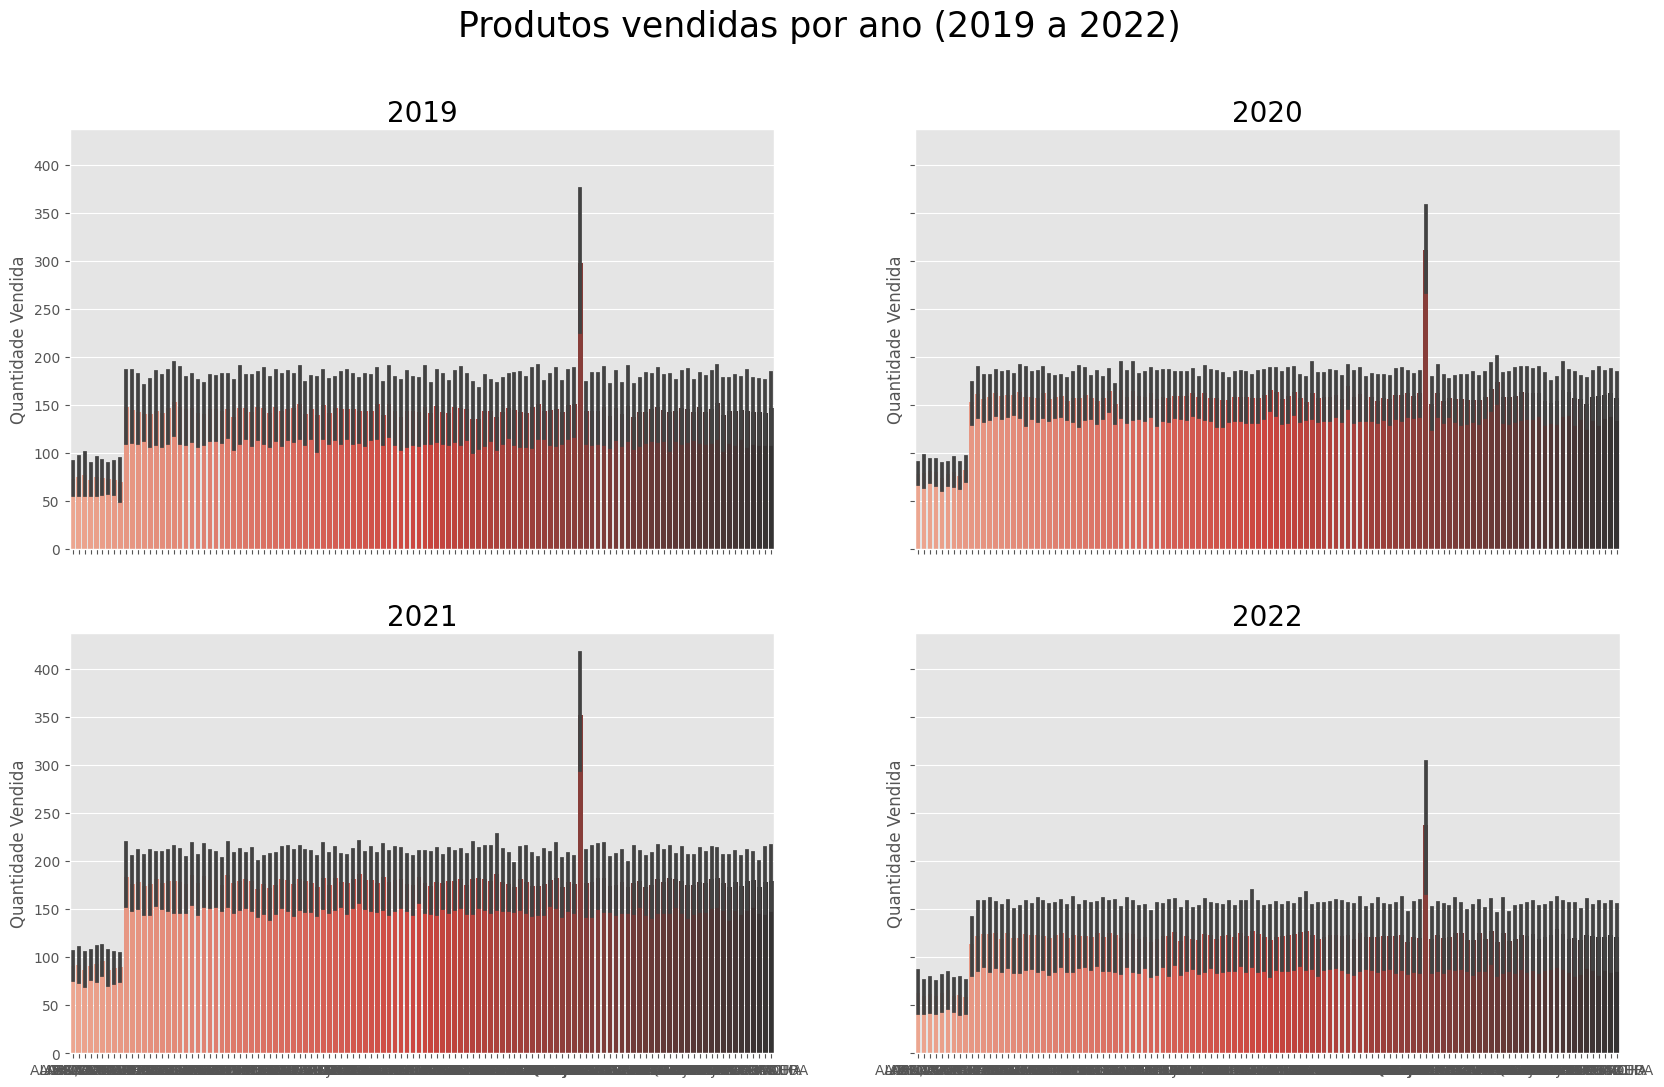

In [22]:
tabela = pd.pivot_table(tmp, values='NOTA_FISCAL', index=['YEAR', 'MONTH'], 
                        columns=['PRODUTO_NOME'], aggfunc='count')

# Criação do gráfico
fig, axs = plt.subplots(2, 2, figsize=(20, 12), sharex=True, sharey=True)
fig.suptitle('Produtos vendidas por ano (2019 a 2022)', fontsize=25)
axs = axs.ravel()

for i, ano in enumerate([2019, 2020, 2021, 2022]):
    dados_ano = tabela.loc[ano]
    sns.barplot(data=dados_ano, ax=axs[i], palette='Reds_d')
    axs[i].set_title(ano, fontsize=20)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Quantidade Vendida')

plt.show()

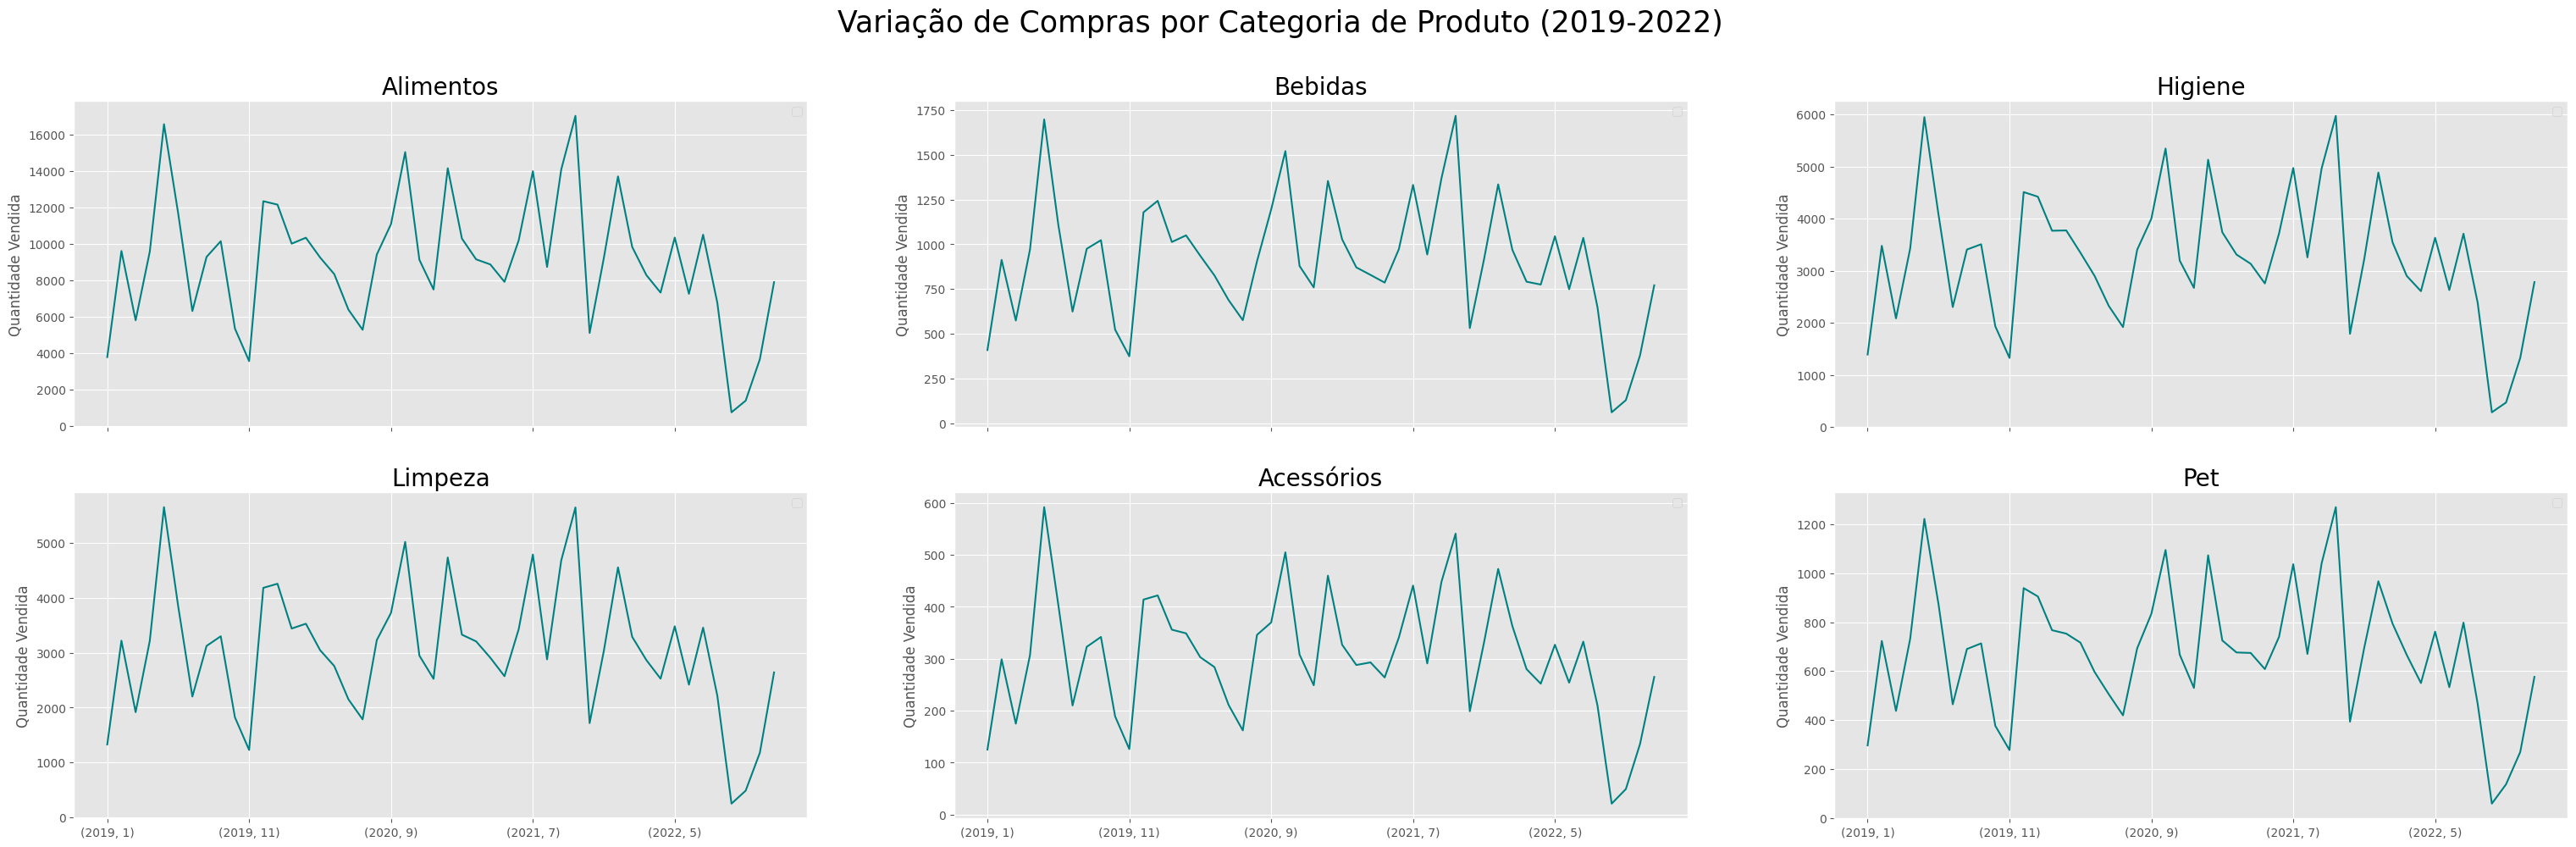

In [23]:
# criação das tabelas pivot para cada categoria de produto
categ = ['Alimentos', 'Bebidas', 'Higiene', 'Limpeza', 'Acessórios', 'Pet']
categoria1 = pd.pivot_table(tmp[tmp['PRODUTO_CATEGORIA'] == 'ALIMENTOS'], values='NOTA_FISCAL', 
                            index=['YEAR', 'MONTH'], aggfunc='count')
categoria2 = pd.pivot_table(tmp[tmp['PRODUTO_CATEGORIA'] == 'BEBIDAS'], values='NOTA_FISCAL', 
                            index=['YEAR', 'MONTH'], aggfunc='count')
categoria3 = pd.pivot_table(tmp[tmp['PRODUTO_CATEGORIA'] == 'HIGIENE'], values='NOTA_FISCAL', 
                            index=['YEAR', 'MONTH'], aggfunc='count')
categoria4 = pd.pivot_table(tmp[tmp['PRODUTO_CATEGORIA'] == 'LIMPEZA'], values='NOTA_FISCAL', 
                            index=['YEAR', 'MONTH'], aggfunc='count')
categoria5 = pd.pivot_table(tmp[tmp['PRODUTO_CATEGORIA'] == 'ACESSORIOS'], values='NOTA_FISCAL', 
                            index=['YEAR', 'MONTH'], aggfunc='count')
categoria6 = pd.pivot_table(tmp[tmp['PRODUTO_CATEGORIA'] == 'PET'], values='NOTA_FISCAL', 
                            index=['YEAR', 'MONTH'], aggfunc='count')
# criação do grid de subplots
fig, axs = plt.subplots(2, 3, figsize=(38, 11), sharex=True, sharey=False)
axs = axs.ravel()

# plotagem dos gráficos para cada categoria de produto
for i, cat in enumerate([categoria1, categoria2, categoria3, categoria4, categoria5, categoria6]):
    cat.plot(ax=axs[i], color='#008080')
    axs[i].set_title(categ[i], fontsize=20)
    axs[i].set_xlabel('')
    axs[i].set_ylabel('Quantidade Vendida')
    axs[i].legend('')

# configuração do título do dashboard
plt.suptitle('Variação de Compras por Categoria de Produto (2019-2022)', fontsize=25);

<div class="markdown-google-sans">

# <strong>Responsáveis pela Análise</strong>
</div>

![](https://github.com/gabrielluizone/Retail-Analysis-One/blob/main/Others/End.png?raw=true)

> [Fernanda Rafaela](https://www.linkedin.com/in/f-rafaela/)\
[Gabriel Luiz](https://www.linkedin.com/in/gabrielluizone/)\
[Gabriel Andrade](https://www.linkedin.com/in/f-rafaela/?miniProfileUrn=urn%3Ali%3Afs_miniProfile%3AACoAAD8GQJsBUImDy810BYpyy25hJzwoTx_19s4)

